# Ensemble Test-Time Augmentation

In this notebook, we show how to use the [ensemble for object detection library](https://github.com/ancasag/ensembleObjectDetection) to combine models constructed with different frameworks. 

## Installation 

First of all, we install all the necessary libraries.

### Installation of [MXNet](https://gluon-cv.mxnet.io/)

In [ ]:
!pip install gluoncv
!pip install mxnet

     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 11.8MB 244kB/s 
     |████████████████████████████████| 317kB 30.9MB/s 
     |████████████████████████████████| 245kB 23.9MB/s 
     |████████████████████████████████| 972kB 46.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 675kB 43.0MB/s 
     |████████████████████████████████| 215kB 38.3MB/s 
     |████████████████████████████████| 133kB 42.6MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 962kB 39.8MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 2.6MB 40.9MB/s 
     |████████████████████████████████| 7.1MB 36.7MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
  Created wheel for ConfigSpace: filena

### Installation of the [Keras library for Mask RCNN](https://github.com/matterport/Mask_RCNN/)

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN/

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (560/560), done.


In [ ]:
cd Mask_RCNN/

/content/Mask_RCNN


In [ ]:
!pip install . --user

Processing /content/Mask_RCNN
  Created wheel for mask-rcnn: filename=mask_rcnn-2.1-cp36-none-any.whl size=56924 sha256=b1d37fc06cd1c2fc20af745e059c9d7dc5a7143e580c2f925f276776ab547b49
  Stored in directory: /tmp/pip-ephem-wheel-cache-enpbuikp/wheels/78/da/b4/63931b0b9847ef98ac88d2b032817246adcf667c5da577133f
Successfully built mask-rcnn


### Installation of the [Keras library for RetinaNet](https://github.com/fizyr/keras-retinanet)

In [ ]:
cd ..

/content


In [ ]:
!git clone https://github.com/fizyr/keras-retinanet

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 6.80 MiB/s, done.
Resolving deltas: 100% (4199/4199), done.


In [ ]:
cd keras-retinanet/

/content/keras-retinanet


In [ ]:
!pip install . --user

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp36-cp36m-linux_x86_64.whl size=168087 sha256=670f9ef5aea5daceaaa4b33ed411774c4adcaa60209df0f43b0b78e3630382df
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=b5581082db2a442ff92dfb1deecce73d5e95723c4595832a6fc740f30dda682a
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


We restart the colab environment to have access to the installed libraries. 

In [ ]:
import os
os.kill(os.getpid(), 9)

### Installation of the ensemble for object detection library

We clone the code from github in the main folder.

In [ ]:
!git clone https://github.com/ancasag/ensembleObjectDetection.git

Cloning into 'ensembleObjectDetection'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 2005 (delta 66), reused 28 (delta 28), pack-reused 1927
Receiving objects: 100% (2005/2005), 86.42 MiB | 6.21 MiB/s, done.
Resolving deltas: 100% (1272/1272), done.


We download the code from github

In [ ]:
cd ensembleObjectDetection/TestTimeAugmentation

/content/ensembleObjectDetection/TestTimeAugmentation


For our examples, we download a folder with images and the weights that will be employed.

In [ ]:
!wget https://www.dropbox.com/sh/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a?dl=1 -O Images.zip 
!wget https://www.dropbox.com/sh/n21kckhsi200b52/AABxspis34aAZiMUp_cQ6RYFa?dl=1 -O weights.zip

--2020-12-15 08:54:25--  https://www.dropbox.com/sh/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a [following]
--2020-12-15 08:54:25--  https://www.dropbox.com/sh/dl/4r4sen849x9gsaa/AAD1R-BxcbJxS_qTha4gmns5a
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49ca8e230b7742843aef526ac6.dl.dropboxusercontent.com/zip_download_get/AoeStCVn7t9GQcdOY-mFSW1-8L0wTSZ02_UMEmRR-kj6Le0gBJoUS52QgTZ3gLMeeMrOiTDGISL5HtScpFSPV5_I7HGaIulWAoC6dOy_Tz2pQA?dl=1 [following]
--2020-12-15 08:54:26--  https://uc49ca8e230b7742843aef526ac6.dl.dropboxusercontent.com/zip_download_get/AoeStCVn7t9GQcdOY-mFSW1-8L0wTSZ02_UMEmRR-kj6Le0gBJoUS52QgTZ3gLMeeMrOiTDGISL

We unzip the downloaded files. 

In [ ]:
!unzip Images.zip -d Images/
!unzip weights.zip -d weights/

Archive:  Images.zip
mapname:  conversion of  failed
 extracting: Images/person.jpg       
 extracting: Images/2007_000032.jpg  
 extracting: Images/2007_000039.jpg  
 extracting: Images/2007_000042.jpg  
 extracting: Images/2007_000033.jpg  
 extracting: Images/2007_000027.jpg  
Archive:  weights.zip
mapname:  conversion of  failed
 extracting: weights/coco.csv        
 extracting: weights/coco.names      
 extracting: weights/yolov3.cfg      
 extracting: weights/yolov3.weights  
 extracting: weights/classesMXnet.txt  
 extracting: weights/mask_rcnn_coco.h5  
 extracting: weights/resnet50_coco_best_v2.1.0.h5  
 extracting: weights/yolo3_darknet53_voc-f5ece5ce.params  
 extracting: weights/ssd_512_resnet50_v1_voc-9c8b225a.params  
 extracting: weights/faster_rcnn_resnet50_v1b_voc-447328d8.params  


We install the [CLoDSA library](https://github.com/joheras/CLoDSA) that is required to run our code.

In [ ]:
!pip install clodsa

     |████████████████████████████████| 5.7MB 5.4MB/s 
     |████████████████████████████████| 276kB 36.4MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.42-py2.py3-none-any.whl size=72140 sha256=9ebf05c881c994bb2747360536ed48606d7aca8d8a4d963d143672dceb5c1f12
  Stored in directory: /root/.cache/pip/wheels/98/7c/f5/4caa95c8cf6a4ed959de7133a5a623ce0c9c4d134e57431204
  Created wheel for commentjson: filename=commentjson-0.9.0-cp36-none-any.whl size=12086 sha256=56e0dab665d5e7deb511d1784ba0ddebbe35358a88144fd471d98608f1c89d2a
  Stored in directory: /root/.cache/pip/wheels/0d/18/46/8da734185b844fc754de60da2c162fc15f7acdacfd4621144e
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62516 sha256=46d32597d22fa449e10c80205b538d6eb1500e07e063eeb5e849eb0cd34b44d8
  Stored in directory: /root/.cache/pip/wheels/01/a2/30/ebae6ffa73cf3aa1c972a24d4c78388afd910f91e43bf554aa
Successfully built clodsa commentjson lark-parser


## Example

For our example, we need to load the following libraries. 

In [ ]:
import testTimeAugmentation
import function
import os
import shutil
import argparse
import ensembleOptions
from mainTTA import tta
from imutils import paths

Now, it is necessary to fix several options.

### Images path
Define the path to the folder containing the images. For this example, we work with the Images folder previously downloaded that contains several images.

In [ ]:
pathImg = 'Images/'

### Select the voting option

You can be taken using three different voting strategies:
*   Affirmative. This means that whenever one of the methods that produce the 
initial predictions says that a region contains an object, such a detection is considered as valid.
*   Consensus. This means that the majority of the initial methods must agree to consider that a region contains an object. The consensus strategy is analogous to the majority voting strategy commonly applied in ensemble methods for images classification.
*   Unanimous. This means that all the methods must agree to consider that a region contains an object.

In [ ]:
option = "unanimous"

Define the model you want to use. With the files previously downloaded, you can construct the following models.

- A YOLO model constructed with the [Darknet](https://pjreddie.com/darknet/yolo/) library for the COCO dataset. 
- A SSD model constructed with the [MXNet](https://gluon-cv.mxnet.io/) library for the Pascal VOC dataset.
- A Faster RCNN model constructed with the [MXNet](https://gluon-cv.mxnet.io/) for the Pascal VOC dataset.
- A YOLO model constructed with the [MXNet](https://gluon-cv.mxnet.io/) for the Pascal VOC dataset.
- A RetinaNet model constructed with the [Keras library for Retinanet](https://github.com/fizyr/keras-retinanet) for the COCO dataset. 
- A MaskRCNN model constructed with the [Keras library for Mask RCNN](https://github.com/matterport/Mask_RCNN/) for the COCO dataset. 

In [ ]:
yoloDarknet = testTimeAugmentation.DarknetYoloPred('weights/yolov3.weights', 'weights/coco.names','weights/yolov3.cfg')
#ssdResnet = testTimeAugmentation.MXnetSSD512Pred('weights/ssd_512_resnet50_v1_voc-9c8b225a.params', 'weights/classesMXnet.txt',0.7)
#fasterResnet = testTimeAugmentation.MXnetFasterRCNNPred('weights/Desktop/peso/faster_rcnn_resnet50_v1b_voc-447328d8.params', 'weights/classesMXnet.txt',0.7)
#yoloResnet = testTimeAugmentation.MXnetYoloPred('weights/Desktop/peso/yolo3_darknet53_voc-f5ece5ce.params', 'weights/classesMXnet.txt',0.7)
#retinaResnet50 = testTimeAugmentation.RetinaNetResnet50Pred('weights/resnet50_coco_best_v2.1.0.h5', 'weights/coco.csv',0.7)
#maskRcnn = testTimeAugmentation.MaskRCNNPred('weights/mask_rcnn_coco.h5', 'weights/coco.names',0.7)


For our examples, we will use these transformations: histogram, hflip and none. And as a model we will use YOLO. The tranformation options are:
- "avgBlur": Apply average blurring
- "bilaBlur": Apply bilateral blurring
- "blur": Apply blurring
- "chanHsv": Change image to hsv color space
- "chanLab": Change image to hsv color space
- "crop": Randomly crop the image
- "dropOut": Apply dropout of some pixels to the image
- "elastic": Apply a elastic transformation
- "histo": Equalize histogram
- "vflip": Apply a vertical flip
- "hflip": Apply a horizontal flip
- "hvflip": Apply a vertical and horizontal flip
- "gamma": Apply gamma coorection
- "blurGau": Apply Gaussian blurring
- "avgNoise": Add Gaussian noise
- "invert": Invert the colours of the image
- "medianblur": Apply median blurring
- "none": none
- "raiseBlue": Raise blue channel
- "raiseGreen": Raise green channel
- "raiseHue": Raise the hue
- "raiseRed": Raise the red channel
- "raiseSatu": Raise the saturation
- "raiseValue": Raise the value
- "resize": Resize
- "rotation10": Rotate 10º
- "rotation90": Rotate 90º
- "rotation180": Rotate 180º
- "rotation270": Rotate 270º
- "saltPeper": Add salt and pepper noise
- "sharpen": Sharpen
- "shiftChannel": Shift channel
- "shearing": Apply shearing
- "translation": Translate the image





In [ ]:
myTechniques = [ "histo","hflip","none"]

Finally, we execute the ensemble method with the options we have selected.

In [ ]:
tta(yoloDarknet,myTechniques,pathImg,option,0.4)

FileExistsError: ignored

The result can be seen in the output folder that has been generated. Next, we show the process that we have carried out with the the three voting strategies.


In order to see the process on an image, we copy the images to all the generated folders.

In [ ]:
!cp Images/2007_000032.jpg salida/histo
!cp Images/2007_000032.jpg salida/none
!cp Images/2007_000032.jpg salida/hflip
!cp Images/2007_000032.jpg salida/output

!cp Images/2007_000032.xml salida/histo
!cp Images/2007_000032.xml salida/none
!cp Images/2007_000032.xml salida/hflip
!cp Images/2007_000032.xml salida/output

We create the following functions that allow us to show the detections on the image.

In [ ]:
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET

def showImage(imagePath):
  image = cv2.imread(imagePath)
  if len(image.shape)==3:
    img2 = image[:,:,::-1]
    plt.imshow(img2)
    plt.show()
  else:
    img2 = image
    plt.imshow(img2,cmap='gray')
    plt.show()

def combineImageAndPrediction(imagePath,xmlPath):
  image = cv2.imread(imagePath)
  tree = ET.parse(xmlPath)
  root = tree.getroot()
  objects = root.findall('object')
  boxes = []
  for object in objects:
    category = object.find('name').text
    confidence = object.find('confidence')
    box = object.find('bndbox')
    x  = int(box.find('xmin').text)
    y = int(box.find('ymin').text)
    ymax = int(box.find('ymax').text)
    xmax = int(box.find('xmax').text)
    
    cv2.rectangle(image, (x,y),(xmax,ymax),(0, 255, 0), 2)
    cv2.putText(image, category, (x-2,y-2), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
  cv2.imwrite('prediction.jpg',image)

### Unanimous

In the case of the none transformation, it produces this:

In [ ]:
!pwd

/content/ensembleObjectDetection/TestTimeAugmentation


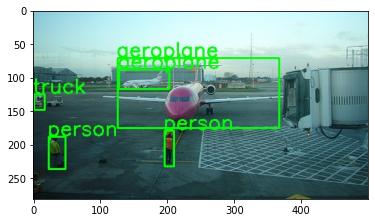

In [ ]:
combineImageAndPrediction('Images/2007_000032.jpg','Images/2007_000032.xml')
showImage('prediction.jpg')


In the case of the histogram:


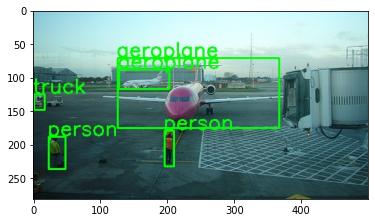

In [ ]:
combineImageAndPrediction('salida/histo/2007_000032.jpg','salida/histo/2007_000032.xml')
showImage('prediction.jpg')


When we apply the hflip transformation:

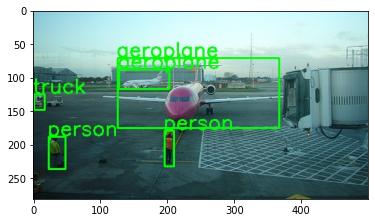

In [ ]:
combineImageAndPrediction('salida/hflip/2007_000032.jpg','salida/hflip/2007_000032.xml')
showImage('prediction.jpg')


And finally, when we apply the ensemble method:

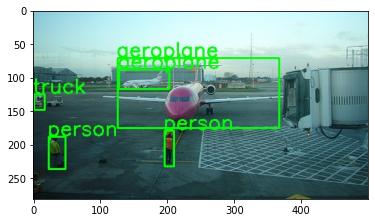

In [ ]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')

We copy the unanimous prediction, and delete the output folder and the temporary folder that has been generated in the images to apply the affirmative option.

In [ ]:
!cp salida/output/2007_000032.jpg 2007_000032.jpg
!cp salida/output/2007_000032.xml unanimous.xml
!rm -rf salida
!rm -rf Images/tmp

### Affirmative

We modify the option and execute the function:


In [ ]:
option = "affirmative"
tta(yoloDarknet,myTechniques,pathImg,option,0.4)


In order to see the process on an image, we copy that image to all folders.

In [ ]:
!mkdir salida
!mkdir salida/histo 
!mkdir salida/none
!mkdir salida/hflip
!mkdir salida/output

!cp Images/2007_000032.jpg salida/histo
!cp Images/2007_000032.jpg salida/none
!cp Images/2007_000032.jpg salida/hflip
!cp Images/2007_000032.jpg salida/output

!cp Images/2007_000032.xml salida/histo
!cp Images/2007_000032.xml salida/none
!cp Images/2007_000032.xml salida/hflip
!cp Images/2007_000032.xml salida/output


In the case of the none transformation, it produces this:

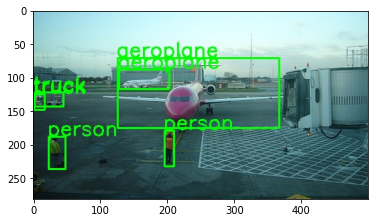

In [ ]:
combineImageAndPrediction('salida/none/2007_000032.jpg','salida/none/2007_000032.xml')
showImage('prediction.jpg')


In the case of the histogram:

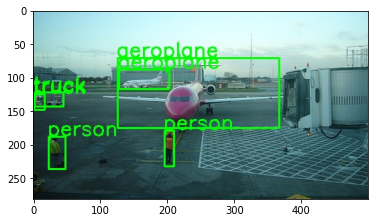

In [ ]:
combineImageAndPrediction('salida/histo/2007_000032.jpg','salida/histo/2007_000032.xml')
showImage('prediction.jpg')

When we apply the hflip transformation:

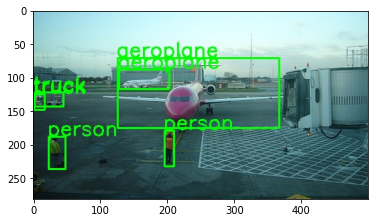

In [ ]:
combineImageAndPrediction('salida/hflip/2007_000032.jpg','salida/hflip/2007_000032.xml')
showImage('prediction.jpg')

And finally the result of applying the ensemble method:

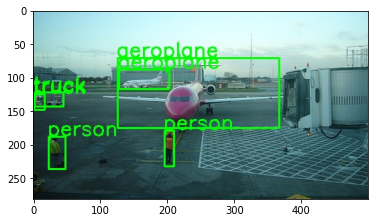

In [ ]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')

We delete the output folder and the temporary folder that has been generated in the images to apply the consensus option.

In [ ]:
!cp salida/output/2007_000032.xml affirmative.xml
!rm -rf salida
!rm -rf Images/tmp

### Consensus

We modify the option and execute the function:

In [ ]:
option = "consensus"
tta(yoloDarknet,myTechniques,pathImg,option,0.4)


In order to see the process on an image, we copy that image to all folders.

In [ ]:
!mkdir salida
!mkdir salida/histo 
!mkdir salida/none
!mkdir salida/hflip
!mkdir salida/output

!cp Images/2007_000032.jpg salida/histo
!cp Images/2007_000032.jpg salida/none
!cp Images/2007_000032.jpg salida/hflip
!cp Images/2007_000032.jpg salida/output

!cp Images/2007_000032.xml salida/histo
!cp Images/2007_000032.xml salida/none
!cp Images/2007_000032.xml salida/hflip
!cp Images/2007_000032.xml salida/output


In the case of the none transformation, it produces this:

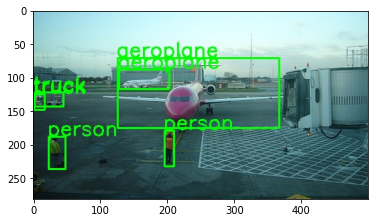

In [ ]:
combineImageAndPrediction('salida/none/2007_000032.jpg','salida/none/2007_000032.xml')
showImage('prediction.jpg')


In the case of the histogram:

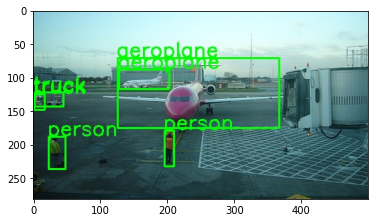

In [ ]:
combineImageAndPrediction('salida/histo/2007_000032.jpg','salida/histo/2007_000032.xml')
showImage('prediction.jpg')

When we apply the hflip transformation:

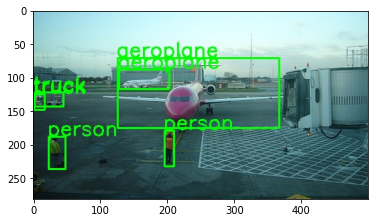

In [ ]:
combineImageAndPrediction('salida/hflip/2007_000032.jpg','salida/hflip/2007_000032.xml')
showImage('prediction.jpg')


And finally the result of applying the ensemble method:

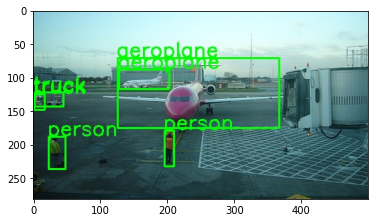

In [ ]:
combineImageAndPrediction('salida/output/2007_000032.jpg','salida/output/2007_000032.xml')
showImage('prediction.jpg')

In [ ]:
!cp salida/output/2007_000032.xml consensus.xml

Now, we can see the difference between the three methods.

Affirmative


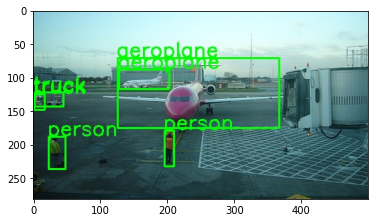

Consensus


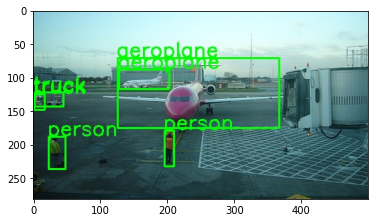

Unanimous


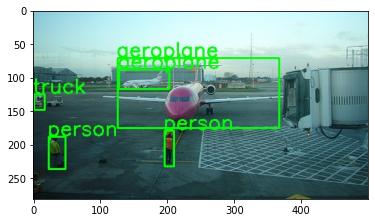

In [ ]:
print('Affirmative')
combineImageAndPrediction('salida/output/2007_000032.jpg','affirmative.xml')
showImage('prediction.jpg')
print('Consensus')
combineImageAndPrediction('salida/output/2007_000032.jpg','consensus.xml')
showImage('prediction.jpg')
print('Unanimous')
combineImageAndPrediction('salida/output/2007_000032.jpg','unanimous.xml')
showImage('prediction.jpg')